<a href="https://colab.research.google.com/github/vedant-1807/Complete-Deep-Learning/blob/master/Transfer_learning_without_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
# code is with fine tuning

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 187MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [24]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [25]:
conv_base = VGG16(weights = 'imagenet', 
                  input_shape=(150,150,3),
                  include_top= False)

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [27]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
#conv_base.trainable = False
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [31]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/train",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/test",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [33]:
model.compile(keras.optimizers.RMSprop(learning_rate=1e-5),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
# normalization

def process(image,label):
  image = tensorflow.cast(image/255, tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [35]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 112ms/step - loss: 0.2341 - accuracy: 0.9003 - val_loss: 0.1522 - val_accuracy: 0.9392
Epoch 2/10
625/625 [==============================] - 78s 124ms/step - loss: 0.1321 - accuracy: 0.9481 - val_loss: 0.1565 - val_accuracy: 0.9384
Epoch 3/10
625/625 [==============================] - 79s 126ms/step - loss: 0.0931 - accuracy: 0.9664 - val_loss: 0.1234 - val_accuracy: 0.9526
Epoch 4/10
625/625 [==============================] - 78s 125ms/step - loss: 0.0654 - accuracy: 0.9779 - val_loss: 0.1253 - val_accuracy: 0.9520
Epoch 5/10
625/625 [==============================] - 78s 125ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.1240 - val_accuracy: 0.9542
Epoch 6/10
625/625 [==============================] - 78s 125ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.1282 - val_accuracy: 0.9538
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.0190 - accuracy: 0.9961 - val_loss: 0.1621 - val_ac

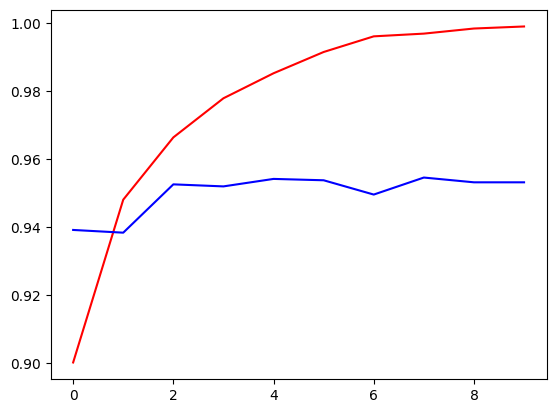

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')

In [20]:
# now the model above has overfitting therefore we are gonna go for data augmentation 